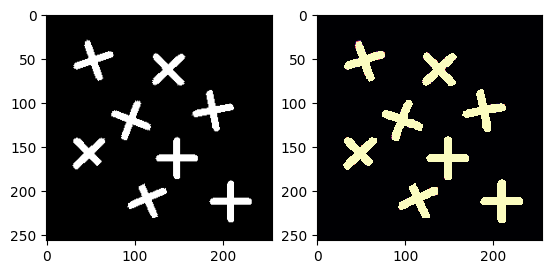

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Versão do Algoritmo (Gabriel. Erro na Rotulação)

class Point:
    def __init__(self, x, y):
        self.x = 0
        self.y = 0
    

img = cv2.imread("art8.png", cv2.IMREAD_GRAYSCALE)
##Valores maiores que 127 estão mais próximos da cor branca (255), então se tornam 1.
##Valores menores que 127 estão mais próximos da cor preta (0), então se tornam 0.
img = cv2.threshold(img, 127, 1, cv2.THRESH_BINARY)[1]
img_rot = np.zeros(img.shape)

label = 1

p = Point(0,0)
pp = Point(0,0)     #Ponto Atual

for i in range(1,img.shape[0]-1):
    for j in range(1,img.shape[1]-1):
        p.x = i
        p.y = j
        
        nextPoints = []
        #Se pixel atual = 1 (branco) na img original mas 0 (preto) na img rotulada (que inicialmente é preta/zerada)...
        if (img[p.x, p.y] == 1 and img_rot[p.x, p.y] == 0):
            img_rot[p.x, p.y] = label       #rotula o pixel.
            nextPoints.append(p)            #adiciona ele em uma pilha (push) para encontrar seus vizinhos.
            while nextPoints != []:
                pp = nextPoints.pop()       #pega o pixel "de volta" e inicia a busca pelos vizinhos.
                
                #Cima
                p.x = pp.x - 1;
                p.y = pp.y;
                if (img[p.x, p.y] == 1) and (img_rot[p.x,p.y] == 0):
                    img_rot[p.x, p.y] = label;
                    print("Cima")
                    nextPoints.append(p);   #pixel vizinho também é rotulado e adicionado na pilha.
            
                #Esquerda
                p.x = pp.x;
                p.y = pp.y - 1;
                if (img[p.x, p.y] == 1) and (img_rot[p.x,p.y] == 0):
                    img_rot[p.x, p.y] = label;
                    print("Esquerda")
                    nextPoints.append(p)
            label = label + 1   

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.imshow(img_rot, cmap='magma', vmin=0, vmax=8)   


In [1]:
# Funções auxiliares (executar primeiros)
# Guilherme

def getSmaller(list):
    smaller = list[0]

    for x in range(1, len(list)):
        if list[x] < smaller: smaller = list[x]

    return smaller

def moreThan(a, b):
    return a > b

Utilizando a vizinhança de 8


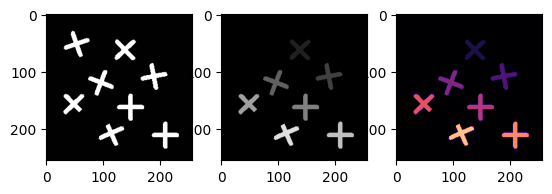

In [2]:
# Exercício 1 (Guilherme)
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

threshold = 127

img = cv2.imread("art8.png", cv2.IMREAD_GRAYSCALE)
labels = [[0 for _ in range(len(img[0]))] for _ in range(len(img))]
labelCount = 1
neighbourLabels = []
labelDictionary = {}
imgGray = [[0 for _ in range(len(img[0]))] for _ in range(len(img))]

# labeling the image
for x in range(len(img)):
    for y in range(len(img[x])):
        neighbourLabels = []

        if img[x][y] >= threshold:
            # if all neighbours are below the threshold
            if (y == 0 or img[x][y - 1] < threshold) and (x == 0 or img[x - 1][y] < threshold) and ((x == 0 or y == 0) or img[x - 1][y - 1] < threshold) and ((x == 0 or y == len(img[x]) - 1) or img[x - 1][y + 1] < threshold): 
                labels[x][y] = labelCount
                labelCount += 1
            else: # if at least one neighbour is above the the threshold
                if y > 0 and labels[x][y - 1] > 0: 
                    neighbourLabels.append(labels[x][y - 1])
                if x > 0 and labels[x - 1][y] > 0:
                    neighbourLabels.append(labels[x - 1][y])
                if (x > 0 and y > 0) and labels[x - 1][y - 1] > 0:
                    neighbourLabels.append(labels[x - 1][y - 1])
                if (x > 0 and y < (len(img[x]) - 1)) and labels[x - 1][y + 1] > 0:
                    neighbourLabels.append(labels[x - 1][y + 1])

                # if only one neighbour is above the threshold
                if len(neighbourLabels) == 1: labels[x][y] = neighbourLabels[0]
                elif len(neighbourLabels) > 1: # if more than one neighbour ia above the threshold
                    smaller = getSmaller(neighbourLabels)
                    labels[x][y] = smaller

                    # Assigning the neighbours labels to the lowest label between the neighbours
                    for u in range(len(neighbourLabels)):
                        if neighbourLabels[u] not in labelDictionary and neighbourLabels[u] != smaller: labelDictionary[neighbourLabels[u]] = smaller

labelDictionary = dict(sorted(labelDictionary.items(), reverse=True))

# Replacing equivalent labels
for label in labelDictionary:
    for a in range(len(labels)):
        for b in range(len(labels[a])):
            if labels[a][b] == label: labels[a][b] = labelDictionary[label]

# Getting the different label values from the labeled image
values = list(set(i for j in labels for i in j))
values.remove(0)
values.sort()

# Creating a grayscale for the labeled image
grayscale = list(range(0, 255, math.ceil(255 / len(values))))

# Converting the labeled image to a grayscale
for g in range(len(labels)):
    for h in range(len(labels[g])):
        if labels[g][h] > 0: imgGray[g][h] = grayscale[values.index(labels[g][h])]

print("Utilizando a vizinhança de 8")

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255);
plt.subplot(1, 3, 2)
plt.imshow(imgGray, cmap='gray', vmin=0, vmax=255);
plt.subplot(1, 3, 3)
plt.imshow(imgGray, cmap='magma', vmin=0, vmax=255);

Utilizando a vizinhança de 8, existem aproximadamente 212 objetos na imagem


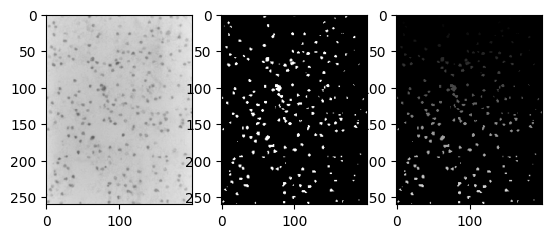

In [3]:
# Exercício 2 (Guilherme)

import cv2
import matplotlib.pyplot as plt
import numpy as np

threshold = 165

img = cv2.imread("clc3.png", cv2.IMREAD_GRAYSCALE)
imgBinary = [[0 for _ in range(len(img[0]))] for _ in range(len(img))]
labels = [[0 for _ in range(len(img[0]))] for _ in range(len(img))]
imgGray = [[0 for _ in range(len(img[0]))] for _ in range(len(img))]
labelCount = 1
neighbourLabels = []
labelDictionary = {}

# Binarizing the image
for c in range(len(img)):
    for d in range(len(img[c])):
        if img[c][d] > threshold: imgBinary[c][d] = 0
        else: imgBinary[c][d] = 255

# labeling the image
for x in range(len(imgBinary)):
    for y in range(len(imgBinary[x])):
        neighbourLabels = []

        if imgBinary[x][y] > 0:
            # if all neighbours are below the threshold
            if (y == 0 or imgBinary[x][y - 1] == 0) and (x == 0 or imgBinary[x - 1][y] == 0) and ((x == 0 or y == 0) or imgBinary[x - 1][y - 1] == 0) and ((x == 0 or y == len(imgBinary[x]) - 1) or imgBinary[x - 1][y + 1] == 0): 
                labels[x][y] = labelCount
                labelCount += 1
            else: # if at least one neighbour is above the the threshold
                if y > 0 and labels[x][y - 1] > 0: 
                    neighbourLabels.append(labels[x][y - 1])
                if x > 0 and labels[x - 1][y] > 0:
                    neighbourLabels.append(labels[x - 1][y])
                if (x > 0 and y > 0) and labels[x - 1][y - 1] > 0:
                    neighbourLabels.append(labels[x - 1][y - 1])
                if (x > 0 and y < (len(imgBinary[x]) - 1)) and labels[x - 1][y + 1] > 0:
                    neighbourLabels.append(labels[x - 1][y + 1])

                # if only one neighbour is above the threshold
                if len(neighbourLabels) == 1: labels[x][y] = neighbourLabels[0]
                elif len(neighbourLabels) > 1: # if more than one neighbour ia above the threshold
                    smaller = getSmaller(neighbourLabels)
                    labels[x][y] = smaller

                    # Assigning the neighbours labels to the lowest label between the neighbours
                    for u in range(len(neighbourLabels)):
                        if neighbourLabels[u] not in labelDictionary and neighbourLabels[u] != smaller: labelDictionary[neighbourLabels[u]] = smaller

labelDictionary = dict(sorted(labelDictionary.items(), reverse=True))

# Replacing equivalent labels
for label in labelDictionary:
    for a in range(len(labels)):
        for b in range(len(labels[a])):
            if labels[a][b] == label: labels[a][b] = labelDictionary[label]

# Getting the different label values from the labeled image
values = list(set(i for j in labels for i in j))
values.remove(0)

print("Utilizando a vizinhança de 8, existem aproximadamente " + str(len(values)) + " objetos na imagem")

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255);
plt.subplot(1, 3, 2)
plt.imshow(imgBinary, cmap='gray', vmin=0, vmax=255);
plt.subplot(1, 3, 3)
plt.imshow(labels, cmap='gray', vmin=0, vmax=255);